### Qual desempenho das escolas de São Paulo de acordo com o IDESP (2023/2024)

 Sobre a pesquisa: O IDESP é um indicador que avalia a qualidade das escolas. Nele, considera–se que uma boa escola é aquela em que a maior parte dos alunos aprende as competências e habilidades requeridas para a sua série/ano, num período de tempo ideal, o ano letivo.
 
Nesse estudo tento contribuir com a pesquisa limpando, organizando e analisando os dados, a fim de trazer insights úteis.

Dados públicos disponíveis em: https://dados.educacao.sp.gov.br/dataset/%C3%ADndice-de-desenvolvimento-da-educa%C3%A7%C3%A3o-do-estado-de-s%C3%A3o-paulo-idesp-por-escola

In [1]:
#Importação das bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Concatenação dos dados
df_1 = pd.read_csv("C:\\Users\\T-Gamer\\Desktop\\IDESP\\IDESP_ESCOLA_2023.csv", sep= ';')
df_2 = pd.read_csv("C:\\Users\\T-Gamer\\Desktop\\IDESP\\IDESP_ESCOLA_2024.csv", sep= ';', encoding='latin-1')
df_final = pd.concat([df_1, df_2])

## 1. Análise exploratória dos dados (EDA)

In [3]:
df_final.head(3)

,ANO,CODIGO_ESCOLA,CODIGO_INEP,CODIGO_DIRETORIA,NOME_DIRETORIA,NOME_ESCOLA,NOME_MUNICIPIO,ANOS_INICIAIS,ANOS_FINAIS
0,2023,12,35000012,10101,NORTE 1,AYRES DE MOURA PROFESSOR,SAO PAULO,NaN,"3,56"
1,2023,24,35000024,10101,NORTE 1,GAVIAO PEIXOTO BRIGADEIRO,SAO PAULO,"3,83","2,86"
2,2023,36,35000036,10101,NORTE 1,JOAO SOLIMEO,SAO PAULO,NaN,"1,75"


In [4]:
print ('### Informações gerais do DataSet:\n')
df_final.info()
print ('\n### Itens nulos:\n')
df_final.isnull().sum()

### Informações gerais do DataSet:

<class 'pandas.core.frame.DataFrame'>
Index: 10133 entries, 0 to 5067
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ANO               10133 non-null  int64 
 1   CODIGO_ESCOLA     10133 non-null  int64 
 2   CODIGO_INEP       10133 non-null  int64 
 3   CODIGO_DIRETORIA  10133 non-null  int64 
 4   NOME_DIRETORIA    10133 non-null  object
 5   NOME_ESCOLA       10133 non-null  object
 6   NOME_MUNICIPIO    10133 non-null  object
 7   ANOS_INICIAIS     2645 non-null   object
 8   ANOS_FINAIS       7329 non-null   object
dtypes: int64(4), object(5)
memory usage: 791.6+ KB

### Itens nulos:



ANO                    0
CODIGO_ESCOLA          0
CODIGO_INEP            0
CODIGO_DIRETORIA       0
NOME_DIRETORIA         0
NOME_ESCOLA            0
NOME_MUNICIPIO         0
ANOS_INICIAIS       7488
ANOS_FINAIS         2804
dtype: int64

Os 'Anos iniciais' representam o começo do ensino fundamental, enquanto os 'Anos finais' o fim do ensino fundamental, antes do ensino médio.
Porém, há um grande volume (por volta de 75%) de dados faltantes nos 'Anos iniciais' de ensino, o que demonstra uma grande lacuna na coleta de dados.


In [5]:
df_final['ANOS_INICIAIS'] = df_final['ANOS_INICIAIS'].str.replace(',','.').astype('float')
df_final['ANOS_FINAIS'] = df_final['ANOS_FINAIS'].str.replace(',','.').astype('float')
#Substituindo , para . para depois transformar índice do IDESP em float
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10133 entries, 0 to 5067
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ANO               10133 non-null  int64  
 1   CODIGO_ESCOLA     10133 non-null  int64  
 2   CODIGO_INEP       10133 non-null  int64  
 3   CODIGO_DIRETORIA  10133 non-null  int64  
 4   NOME_DIRETORIA    10133 non-null  object 
 5   NOME_ESCOLA       10133 non-null  object 
 6   NOME_MUNICIPIO    10133 non-null  object 
 7   ANOS_INICIAIS     2645 non-null   float64
 8   ANOS_FINAIS       7329 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 791.6+ KB


In [6]:
df_final.duplicated().sum() #Checando possíveis duplicatas nos dados

np.int64(0)

## 2. Pré-processamento

Usei a média do Município para preencher os dados faltantes da coluna "Anos Finais". Vou usar apenas o índice dos Anos Finais para fins de comparação entre escolas.

In [7]:
df_bckp = df_final.copy() #Backup do DataSet

In [8]:
df_bckp = df_bckp.rename(columns= {'ANOS_FINAIS': 'NOTA_IDESP'}) #Para ficar mais claro, renomeei a coluna "anos finais"
df_bckp = df_bckp.drop(columns='ANOS_INICIAIS') #Descartei anos iniciais por excesso de valores ausentes, considerei que 25% seria muito baixo para buscar preencher NA com média/moda ou mediana

media_por_municipio = df_bckp.dropna(subset=['NOTA_IDESP']).groupby('NOME_MUNICIPIO')['NOTA_IDESP'].mean() #Limpa valores nulos e retorna média por município 

df_bckp['NOTA_IDESP'] = df_bckp['NOTA_IDESP'].fillna(df_bckp['NOME_MUNICIPIO'].map(media_por_municipio)) 
#Above: A variável (media_por_municipio) gerou uma Series com Chave = Municipio e Valor = Média. No Fillna eu uso Município como 'chave' para resgatar os valores dentro da variável.

df_bckp[df_bckp['NOTA_IDESP'].isna()] 

,ANO,CODIGO_ESCOLA,CODIGO_INEP,CODIGO_DIRETORIA,NOME_DIRETORIA,NOME_ESCOLA,NOME_MUNICIPIO,NOTA_IDESP
364,2023,4065,35004065,20408,LIMEIRA,MARIA CARMEN CODO JACOMINI,SANTA GERTRUDES,NaN
372,2023,4118,35004118,20208,CARAGUATATUBA,JOS? ANTONIO SANCHES GONZALEZ PROF.,ILHABELA,NaN
864,2023,9787,35009787,10703,ITAPEVI,IVANI MARIA PAES PROFESSORA,BARUERI,NaN
865,2023,9799,35009799,10703,ITAPEVI,CAIO PRADO JUNIOR DEPUTADO,BARUERI,NaN
867,2023,9830,35009830,10703,ITAPEVI,REPUBLICA DO EQUADOR,BARUERI,NaN
...,...,...,...,...,...,...,...,...
4641,2024,918805,35918805,10703,ITAPEVI,LEONOR MENDES DE BARROS,BARUERI,NaN
4697,2024,920241,35920241,10703,ITAPEVI,PARQUE IMPERIAL,BARUERI,NaN
4717,2024,920642,35920642,20404,CAMPINAS OESTE,MARIA DO CARMO RICCI VON ZUBEN PROFESSORA,VINHEDO,NaN
4799,2024,922766,35922766,20306,ITU,VICTORIA MARCON BELLUCCI PROFA,CERQUILHO,NaN


Ainda existem valores Nulos já que municípios INTEIROS ficaram sem uma avaliação IDESP nesses dois anos (2023-2024), como é o caso de Barueri.

In [9]:
df_bckp.loc[df_bckp['NOME_MUNICIPIO'] == 'BARUERI'].nlargest(5, columns='NOTA_IDESP') #nlargest apenas para diminuir o código, mas todo Município está como NaN    

,ANO,CODIGO_ESCOLA,CODIGO_INEP,CODIGO_DIRETORIA,NOME_DIRETORIA,NOME_ESCOLA,NOME_MUNICIPIO,NOTA_IDESP
864,2023,9787,35009787,10703,ITAPEVI,IVANI MARIA PAES PROFESSORA,BARUERI,NaN
865,2023,9799,35009799,10703,ITAPEVI,CAIO PRADO JUNIOR DEPUTADO,BARUERI,NaN
867,2023,9830,35009830,10703,ITAPEVI,REPUBLICA DO EQUADOR,BARUERI,NaN
870,2023,9878,35009878,10703,ITAPEVI,ALAYDE DOMINGUES COUTO MACEDO PROFESSORA,BARUERI,NaN
872,2023,9891,35009891,10703,ITAPEVI,JOSE WILSON PADINHA PROFESSOR,BARUERI,NaN


 Nesse caso resolvi trabalhar apenas com os Municípios que contenham pelo menos uma escola avaliada.

In [10]:
df_bckp = df_bckp.dropna(subset=['NOTA_IDESP'])
df_bckp

,ANO,CODIGO_ESCOLA,CODIGO_INEP,CODIGO_DIRETORIA,NOME_DIRETORIA,NOME_ESCOLA,NOME_MUNICIPIO,NOTA_IDESP
0,2023,12,35000012,10101,NORTE 1,AYRES DE MOURA PROFESSOR,SAO PAULO,3.560000
1,2023,24,35000024,10101,NORTE 1,GAVIAO PEIXOTO BRIGADEIRO,SAO PAULO,2.860000
2,2023,36,35000036,10101,NORTE 1,JOAO SOLIMEO,SAO PAULO,1.750000
3,2023,48,35000048,10101,NORTE 1,WALFREDO ARANTES CALDAS PROFESSOR,SAO PAULO,2.720134
4,2023,59,35000059,10101,NORTE 1,SEBASTIAO DE OLIVEIRA GUSMAO PROFESSOR,SAO PAULO,2.720134
...,...,...,...,...,...,...,...,...
5063,2024,926048,35926048,10211,LESTE 3,BARRO BRANCO II,SAO PAULO,2.330000
5064,2024,926059,35926059,10503,ITAQUAQUECETUBA,PARQUE VIVIANE JARDIM ADRIANA,ITAQUAQUECETUBA,1.920000
5065,2024,926073,35926073,20202,GUARATINGUETA,BAIRRO DA BARRA,CUNHA,3.940000
5066,2024,926085,35926085,20202,GUARATINGUETA,BAIRRO DA BOCAINA,CUNHA,3.960000


## 3. Análise Inicial

Quais as escolas com a melhor e pior média nos últimos dois anos de avaliação IDESP (2023-2024)?  

In [11]:
top_medias = df_bckp.groupby(['NOME_ESCOLA'])['NOTA_IDESP'].mean().nlargest(3) 
piores_medias = df_bckp.groupby(['NOME_ESCOLA'])['NOTA_IDESP'].mean().nsmallest(10).sort_values(ascending=True)
#ABOVE: Melhores e piores 3 escolas do ano de 2023 e do ano de 2024. Não acho que esse dado seja relevante de ser divulgado, apenas serviria como parâmetro para
#Uma investigação interna do que está sendo feito de melhor na Top 3, na tentativa de replicar o padrão para as piores escolas avaliadas.
print (f'\nEsses são as três() Escolas com as melhores médias:\n\n{top_medias}')



Esses são as três() Escolas com as melhores médias:

NOME_ESCOLA
ASSENTAMENTO SANTA CLARA                 7.59
BARAO DO RIO BRANCO                      7.07
MARIA CONCEICAO APARECIDA BASSO PROFA    6.83
Name: NOTA_IDESP, dtype: float64


E quais municípios com as melhores e piores performances?


In [12]:
top_municipio = df_bckp.groupby(['NOME_MUNICIPIO'])['NOTA_IDESP'].mean().nlargest(3)
piores_medias_municipio = df_bckp.groupby(['NOME_MUNICIPIO'])['NOTA_IDESP'].mean().nsmallest(3) 
print (f'\nEsses são os três(3) Municípios com as melhores médias:\n\n{top_municipio}')


Esses são os três(3) Municípios com as melhores médias:

NOME_MUNICIPIO
IRAPUA                    5.630
SANTANA DA PONTE PENSA    5.580
BOFETE                    5.185
Name: NOTA_IDESP, dtype: float64


Houve algum aumento na média geral do índice IDESP entre as escolas nos anos de 2024 e 2025?

In [13]:
media_idesp_2023 = df_bckp[df_bckp['ANO'] == 2023].agg({'NOTA_IDESP': lambda x: round(x.mean(), 2)})
media_idesp_2024 = df_bckp[df_bckp['ANO'] == 2024].agg({    'NOTA_IDESP': lambda x: round(x.mean(), 2)})
progresso_por_ano = media_idesp_2024-media_idesp_2023 #Inverti para deixar o valor positivo

print('Houve um aumento na média geral das escolas?')
print (f'\nA média IDESP de 2023 foi de: {media_idesp_2023.values} para todas as escolas.')
print (f'Já a média IDESP de 2024 foi de: {media_idesp_2024.values} para todas as escolas.\n')
print (f'Isso equivale a um aumento de: {progresso_por_ano.values} na média geral de avaliação das escolas.')

#SIM. Houve um pequeno aumento na média geral das escolas avaliadas.

Houve um aumento na média geral das escolas?

A média IDESP de 2023 foi de: [2.93] para todas as escolas.
Já a média IDESP de 2024 foi de: [3.02] para todas as escolas.

Isso equivale a um aumento de: [0.09] na média geral de avaliação das escolas.


Quais escolas mais aumentaram a nota de um ano para o outro, contribuindo para esse progresso no índice?

In [14]:
maior_salto_23 = df_bckp[(df_bckp['ANO']==2023)].groupby('NOME_ESCOLA')['NOTA_IDESP'].mean().sort_values()
maior_salto_24 = df_bckp[(df_bckp['ANO']==2024)].groupby('NOME_ESCOLA')['NOTA_IDESP'].mean().sort_values()
maior_salto = (maior_salto_24 - maior_salto_23) #Quanto progrediu, retorna Series
#Above: Valor inicial menos valor final retorna quanto a escola progrediu de um ano para outro.

id_maiores_valores = maior_salto.nlargest(3).index #Retorna o NOME (que agora é o index da Series) da escola que mais progrediu
maiores_valores = maior_salto.nlargest(3) #Retorna o valor da progressão em si, para poder classificar 

valores_iniciais = maior_salto_23.loc[id_maiores_valores] #Usa o ID coletado em IDMAX para localizar o valor inicial

print(f'\nMaior aumento na média geral (de 2023 para 2024):\n\n{maiores_valores}')




Maior aumento na média geral (de 2023 para 2024):

NOME_ESCOLA
RIBEIRINHOS                        5.43
GLEBA XV DE NOVEMBRO               5.40
FELICIA ADELVAIS PAGLIUSO PROFA    4.35
Name: NOTA_IDESP, dtype: float64


Confirmando a lógica, as escolas que mais progrediram foram:

In [15]:
df_bckp.loc[(df_bckp['NOME_ESCOLA'].isin(['RIBEIRINHOS', 'GLEBA XV DE NOVEMBRO', 'FELICIA ADELVAIS PAGLIUSO PROFA']))].sort_values(by="NOME_ESCOLA")

,ANO,CODIGO_ESCOLA,CODIGO_INEP,CODIGO_DIRETORIA,NOME_DIRETORIA,NOME_ESCOLA,NOME_MUNICIPIO,NOTA_IDESP
1912,2023,25124,35025124,20511,TAQUARITINGA,FELICIA ADELVAIS PAGLIUSO PROFA,TAQUARITINGA,1.93
1882,2024,25124,35025124,20511,TAQUARITINGA,FELICIA ADELVAIS PAGLIUSO PROFA,TAQUARITINGA,6.28
3938,2023,903620,35903620,20909,MIRANTE DO PARANAPANEMA,GLEBA XV DE NOVEMBRO,ROSANA,3.25
3959,2024,903620,35903620,20909,MIRANTE DO PARANAPANEMA,GLEBA XV DE NOVEMBRO,ROSANA,8.65
4393,2023,911860,35911860,20909,MIRANTE DO PARANAPANEMA,RIBEIRINHOS,ROSANA,1.83
4404,2024,911860,35911860,20909,MIRANTE DO PARANAPANEMA,RIBEIRINHOS,ROSANA,7.26


## 4. Principais descobertas e possíveis ações:

#### A. Descoberta: Ausência de dados, principalmente entre os 'Anos Iniciais' nas escolas avaliadas. Chegando a 79% de dados ausentes nessa coluna, o que forçou a pesquisa a seguir apenas com os dados dos 'Anos Finais' das escolas.

Total de dados esperados: 10133 (considerando duas pesquisas por escola (2023 e 2024))
Dados recebidos: 2645


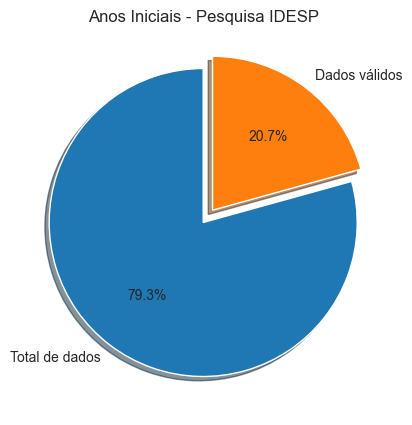

In [19]:
sns.set_style('darkgrid')

#Gráfico de pizza com o círculo inteiro sendo a quantidade de dados válidos possíveis e o recorte sendo a parte válida de ANOS_INICIAIS

plt.figure(figsize=(5,5))
nulos = df_final['ANOS_INICIAIS'].notnull().sum()
total_rows = df_final['CODIGO_ESCOLA'].count() 
print (f'Total de dados esperados: {total_rows} (considerando duas pesquisas por escola (2023 e 2024))\nDados recebidos: {nulos}') 
#ABOVE: Algumas escolas se repetem, mas 

plt.pie([total_rows, nulos], labels=['Total de dados', 'Dados válidos'], explode=[0.0,0.1], shadow=True, autopct='%1.1f%%', startangle=90)
plt.title('Anos Iniciais - Pesquisa IDESP')
plt.show()

Sugestão: Baseado na ausência de dados, recomendo uma campanha para coleta e atualização visando atingir pelo menos 80% das escolas. Existem municípios inteiros (como Barueri) que não foram avaliados nesses dois anos.
> Objetivo: Ter informação suficiente e atualizada para acompanhar progresso das escolas, assim como entender os melhores locais para aplicação de políticas públicas. 

#### B. Descoberta: Grande salto nas médias escolares de algumas escolas. 

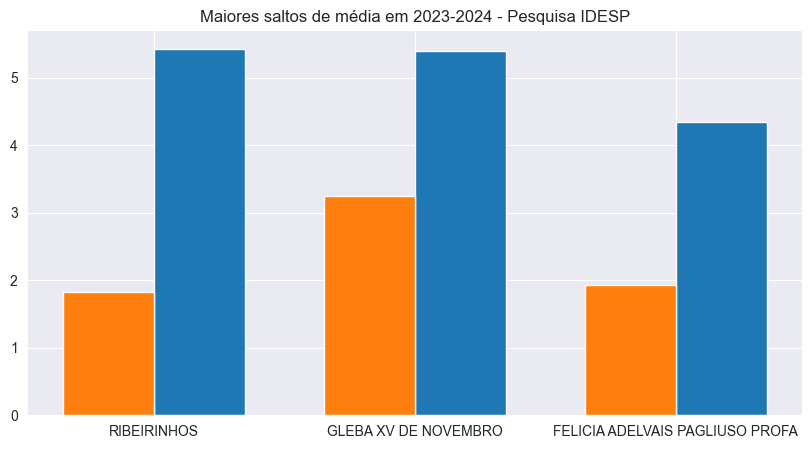

In [17]:
largura = 0.35
x = np.arange(len(id_maiores_valores)) #Cria Array posicional para separar as duas barras

plt.figure(figsize=(10,5)) #Tamanho
plt.bar(x+largura/2, maiores_valores, width=largura) #Cria primeira barra 
plt.bar(x-largura/2, valores_iniciais, width=largura) #Cria segunda barra

plt.title('Maiores saltos de média em 2023-2024 - Pesquisa IDESP') #Título

plt.xticks(x, id_maiores_valores) #Substitui valores de X (posições) novamente para os IDs
plt.show()

Sugestão: Estudar as escolas que tiveram um salto no progresso de um ano para outro, assim como as que se mantiveram com uma média alta nos dois anos.
> Objetivo: Entender o que foi feito de positivo e como reproduzir isso nas escolas com as piores médias. 

#### C. Descoberta: Escolas com as 10 piores médias nos 2 anos.




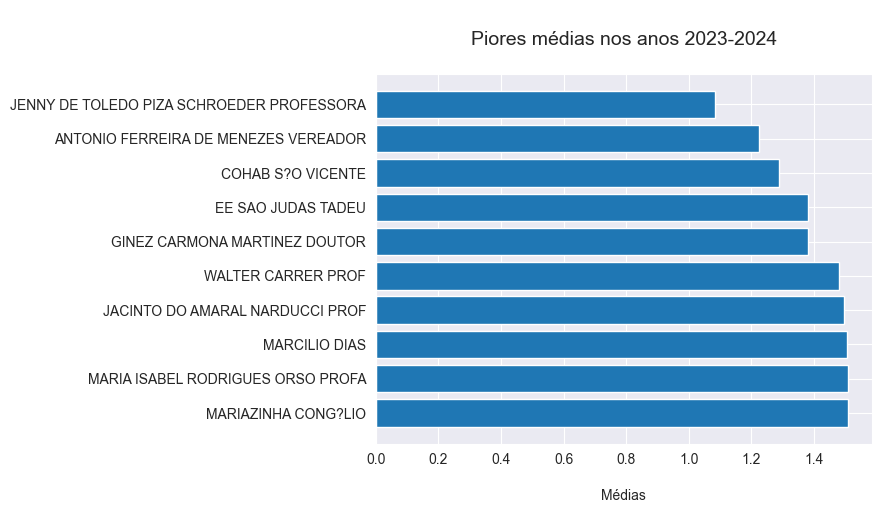

In [18]:
plt.barh(piores_medias.index, piores_medias)

plt.title(f'\nPiores médias nos anos 2023-2024\n', ha='center', fontsize=14)
plt.xlabel(f'\nMédias')

plt.gca().invert_yaxis() #Inverte Y, mesmo com o Ascending=True o gráfico estava mostrando os maiores valores primeiro
plt.show()

Sugestão: Aplicar descobertas feitas em escolas com melhor desempenho.
> Objetivo: Aumentar o padrão de ensino começando pelas escolas que mais afetam negativamente a média.